# Machine Learning Intern Assessment Assignment

## Customer Churn Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

### Meet and Greet Data

In this phase we will import csv and analyze it

In [3]:
customer = pd.read_excel("D:\Data Analysis\Machine Learning Intern Task\customer_churn_large_dataset.xlsx")

In [4]:
cust_copy = customer.copy()

In [5]:
cust_copy.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
print("The shape of customer churn dataset: ", cust_copy.shape)
cust_copy.info()

The shape of customer churn dataset:  (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [43]:
print("Sum of all the null values in customer churn dataset: \n", cust_copy.isnull().sum())

Sum of all the null values in customer churn dataset: 
 CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


In [8]:
cust_copy.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

### Statistical Paramteres

In [9]:
cust_copy.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### Correlation of Data

In [10]:
cust_copy.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


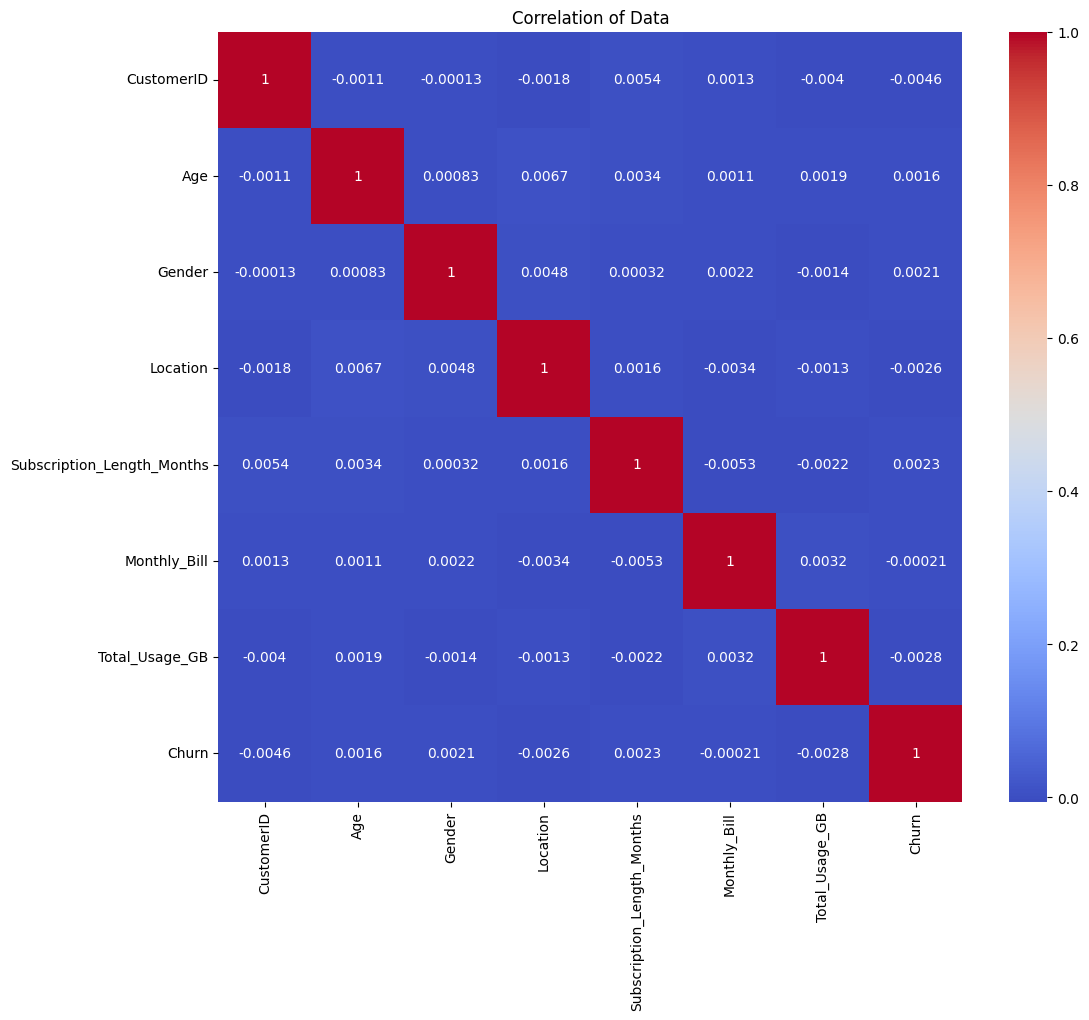

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(cust_copy.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Data")
plt.show()

- In this correlation we can see that mostly are not much correlated with each other 

### Feature Engineering

#### Handling Outliers

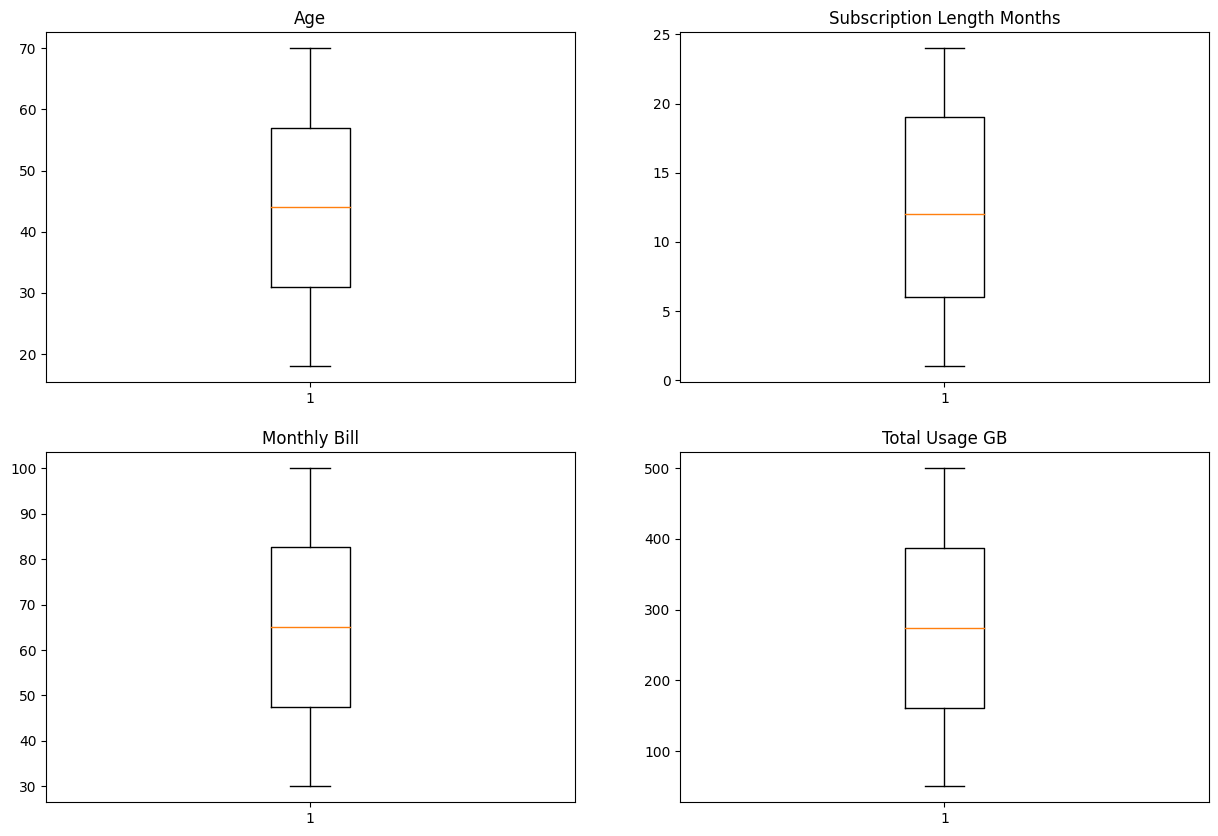

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0, 0].boxplot(cust_copy['Age'])
ax[0, 0].set_title('Age')
ax[0, 1].boxplot(cust_copy['Subscription_Length_Months'])
ax[0, 1].set_title('Subscription Length Months')
ax[1, 0].boxplot(cust_copy['Monthly_Bill'])
ax[1, 0].set_title('Monthly Bill')
ax[1, 1].boxplot(cust_copy['Total_Usage_GB'])
ax[1, 1].set_title('Total Usage GB')
plt.show()

- We can see that there are not a single outliers in our dataset
- So we don't have to remove outliers, procced to enocoding phase 

#### Label Encoding

- So we Encode the Gender column with Label encoder

In [13]:
le = LabelEncoder()
cust_copy['Gender'] = le.fit_transform(cust_copy['Gender'])

In [14]:
# cust_copy['Gender'] = cust_copy['Gender'].map({'Male':0, 'Female':1})

#### Encode through Mapping

- In this phase we encode location column through mapping
- For this we find out unique values of it
- Mapping enocding is efficient method for encoding

In [15]:
cust_copy.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [16]:
cust_copy['Location'] = cust_copy['Location'].map({'Los Angeles':0, 'New York':1, 'Miami':2, 'Chicago':3, 'Houston':4})

In [17]:
cust_copy.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,0,17,73.36,236,0
1,2,Customer_2,62,0,1,1,48.76,172,0
2,3,Customer_3,24,0,0,5,85.47,460,0
3,4,Customer_4,36,0,2,3,97.94,297,1
4,5,Customer_5,46,0,2,19,58.14,266,0


- So we encode all the necessary columns, now move forward

#### Feature Selection

- First, we’ll find out which feature are most important for our model to work well. Then, we’ll
remove any unnecessary feature to make our model perform even better.

In [18]:
x = cust_copy.drop(['Name', 'CustomerID', 'Churn'], axis=1)
y = cust_copy['Churn']

In [19]:
et = ExtraTreesClassifier()
et.fit(x,y)

ExtraTreesClassifier()

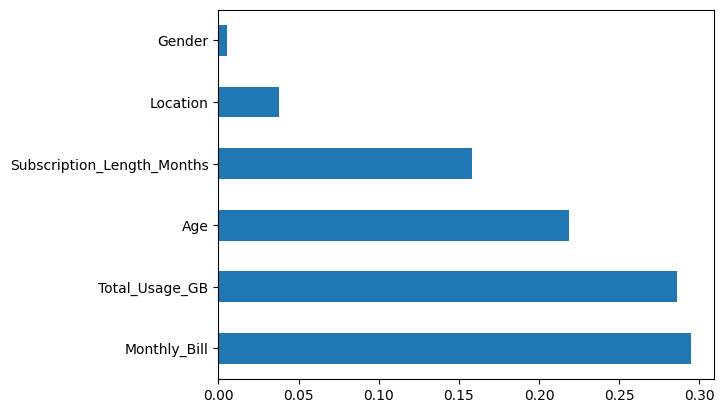

In [20]:
feature_imp = pd.Series(et.feature_importances_, index=x.columns)
feature_imp.nlargest(6).plot(kind='barh')
plt.show()

- From the bar plot we can see the importances of features based on it’s impact towards output.
- Let’s take up the top 6 features, and from that we select 4

### Train Test Split

- Let’s drop the required and split the data into train and test

In [21]:
x = cust_copy.drop(['Name', 'CustomerID', 'Gender', 'Location', 'Churn'], axis=1)
y = cust_copy['Churn']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8, random_state=124587)

In [23]:
len(x_train)

80000

In [24]:
len(x_test)

20000

### Model Selection

- Let’s do the process and select the best model

In [25]:
lr_cv = LogisticRegression(random_state=0)
dt_cv = DecisionTreeClassifier()
rf_cv = RandomForestClassifier()
kn_cv = KNeighborsClassifier()
bn_cv = BernoulliNB()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree Classifier', 2: 'Random Forest Classifier', 3:'KNeighbour Classifier', 4:'Bernoulib'}

cv_model = [lr_cv, dt_cv, rf_cv, kn_cv, bn_cv]

for i,model in enumerate(cv_model):
    
    score = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
                    
    print("{} Test Accuracy: {}".format(cv_dict[i], score))

Logistic Regression Test Accuracy: 0.50011
Decision Tree Classifier Test Accuracy: 0.5027699999999999
Random Forest Classifier Test Accuracy: 0.50038
KNeighbour Classifier Test Accuracy: 0.50205
Bernoulib Test Accuracy: 0.50221


####  Logistic Regression with Hypyerparameter tuning

- Let’s fit the model in Logistic Regression to figure out Accuracy of our mode

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50), 'penalty':['l1','l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5,verbose=0,n_jobs=-1)
best_model = clf.fit(x_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(x_test,y_test))

LogisticRegression(C=0.0020235896477251557, random_state=0)
The mean accuracy of the model is: 0.50275


- The accuracy of this model is not much, let's try more

In [32]:
lr = LogisticRegression(C=0.0020235896477251557, random_state=0)
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr.score(x_train,y_train)

0.5042125

In [38]:
print("Logistic Regrssion Mean Absolute Error: ", mean_absolute_error(y_test,lr_predict))
print("Logistic Regrssion Mean Square Error: ", mean_squared_error(y_test,lr_predict))
print("Logistic Regrssion Test Score: ", lr.score(x_test,y_test))

Logistic Regrssion Mean Absolute Error:  0.49725
Logistic Regrssion Mean Square Error:  0.49725
Logistic Regrssion Test Score:  0.50275


#### Decision Tree Classifier

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt.score(x_train,y_train)

0.9999875

In [37]:
print("Decision Tree Classifier Mean Absolute Error: ", mean_absolute_error(y_test,dt_predict))
print("Decision Tree Classifier Mean Square Error: ", mean_squared_error(y_test,dt_predict))
print("Decision Tree Classifier Test Score: ", dt.score(x_test,y_test))

Decision Tree Classifier Mean Absolute Error:  0.4896
Decision Tree Classifier Mean Square Error:  0.4896
Decision Tree Classifier Test Score:  0.5104


#### Random Forest Classifier

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf.score(x_train,y_train)

0.9999875

In [39]:
print("Random Forest Classifier Mean Absolute Error: ", mean_absolute_error(y_test,rf_predict))
print("Random Forest Classifier Mean Square Error: ", mean_squared_error(y_test,rf_predict))
print("Random Forest Classifier Test Score: ", rf.score(x_test,y_test))

Random Forest Classifier Mean Absolute Error:  0.50035
Random Forest Classifier Mean Square Error:  0.50035
Random Forest Classifier Test Score:  0.49965


#### KNeighbour Classifier

In [34]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_predict = kn.predict(x_test)
kn.score(x_train,y_train)

0.6842375

In [40]:
print("KNeighbour Classifier Mean Absolute Error: ", mean_absolute_error(y_test,kn_predict))
print("KNeighbour Classifier Mean Square Error: ", mean_squared_error(y_test,kn_predict))
print("KNeighbour Classifier Test Score: ", kn.score(x_test,y_test))

KNeighbour Classifier Mean Absolute Error:  0.4914
KNeighbour Classifier Mean Square Error:  0.4914
KNeighbour Classifier Test Score:  0.5086


#### BernoulliNB Classifier

In [35]:
bn = BernoulliNB()
bn.fit(x_train,y_train)
bn_predict = bn.predict(x_test)
bn.score(x_train,y_train)

0.501175

In [41]:
print("Bernoulib Classifier Mean Absolute Error: ", mean_absolute_error(y_test,bn_predict))
print("Bernoulib Classifier Mean Square Error: ", mean_squared_error(y_test,bn_predict))
print("Bernoulib Classifier Test Score: ", bn.score(x_test,y_test))

Bernoulib Classifier Mean Absolute Error:  0.49365
Bernoulib Classifier Mean Square Error:  0.49365
Bernoulib Classifier Test Score:  0.50635


- From all of this Decision Tree has best accuracy
- So we try that as user input prediction

### User Input Prediction

In [42]:
def predication():
    age = int(input("Enter your age: "))
    months = int(input("Enter the months of subsciption: "))
    bill = float(input("Enter the bill amount: "))
    gb = float(input("Enter the GB used: "))
    
    col = [age, months, bill, gb]
    
    dt_pre = dt.predict([col])
    
    print("Churn Prediction: ", dt_pre)
    
predict = predication()

predict

Enter your age: 63
Enter the months of subsciption: 17
Enter the bill amount: 73.36
Enter the GB used: 236
Churn Prediction:  [0]


- It Predicted correct and We built accurate model of Churn Prediction

### Conclusion

After analyzing the data for Churn Predication we can say that Age, Length of Monthly Subscription, Bill Amount, GB used are major feature for prediction of Churn.

- For making customer not to churn we have to understand the need of customer
- Provide better service to customers
- Deliver good quality of service
- Continuously Make imporvement in service